## 基本的なグラフのプロット方法　matplotlib

**1．折れ線グラフ**<br>
ax.plot(x)

**2．棒グラフ**<br>
ax.bar(x_label, y)

**3．散布図**<br>
ax.scatter(x, y)

**4．ヒストグラム**<br>
ax.hist(x, bins=n_bins)

**5．箱ひげ図**<br>
ax.boxplot(x)

**6．バイオリンプロット**<br>
ax.violinplot(x)

**7．ヒートマップ**<br>
ax.imshow

In [122]:
%matplotlib inline
# ライブラリ読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
# データセット読み込み・データ加工
beer_recipe = pd.read_csv('../data/recipeData.csv', index_col=0)

### 1．折れ線グラフ 

今回は適切な「推移」データが存在しないためrandomサンプルデータで描画する

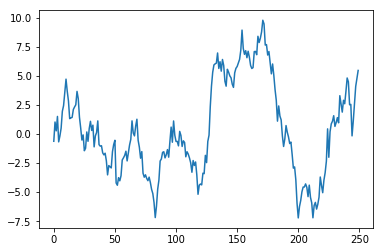

In [123]:
# テストデータ作成
values=np.cumsum(np.random.randn(250,1))
# 基本はplotするだけ
plt.plot(values)

### 2．棒グラフ

項目ごとの比較に使用する<br>
項目が多すぎるとグラフが煩雑になるので工夫が必要<br>
項目名が長い文字列の場合は、下記のように横向きのグラフが見やすくなる<br>

Text(0.5,0,'counts')

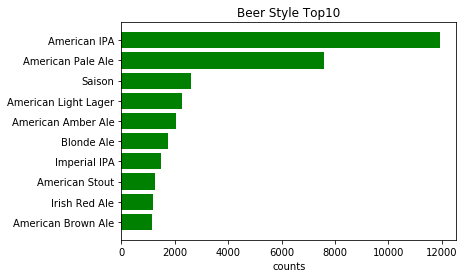

In [124]:
# データ紹介使用したビールのスタイルから上位10 Styleをグラフ化
obj = beer_recipe['Style'].value_counts()
obj.columns = ['count']

# 上位10位のStyle多い方が上に来るように並び替え
obj10 = obj.head(10).sort_values()

plt.figure(figsize=(6,4))
plt.barh(obj10.index, obj10, color='green')

# タイトルとラベル名追加
plt.title('Beer Style Top10')
plt.xlabel('counts')

---
**2データの比較**<br>
データの比較にも使うことができる<br>
下記は、上位5位のStyleごとに、OGとFGの比較をしているグラフ<br>
OGとFGは、発酵前後の値のため、それぞれ発酵の工程でどれだけ変化があるか比較できる<br>
さらに、それが5種類のStyleで変化に違いがあるかを比較する

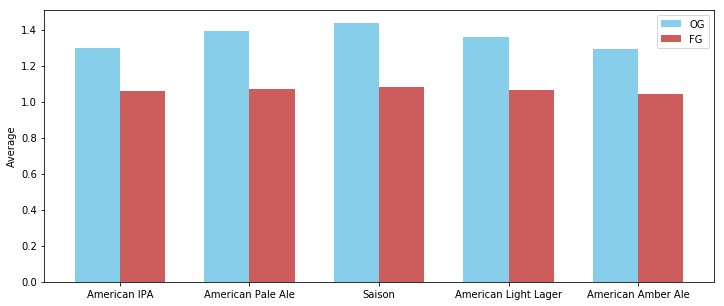

In [125]:
top5 = list(obj.head(5).index)

# Top5のレシピデータセット
comp_data = beer_recipe.query('Style in @top5')

# 比較したい2項目にして、groupby
comp_mean = comp_data.groupby('Style').mean()
comp_value = comp_mean[['OG','FG']]

ind = np.arange(len(comp_value))  # 横軸の値の配置
width = 0.35  # 棒グラフの幅

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(ind - width/2, comp_value['OG'], width, color='SkyBlue', label="OG")
rects2 = ax.bar(ind + width/2, comp_value['FG'], width, color='IndianRed', label="FG")

# x軸のラベルやその他のテキスト追加.
ax.set_ylabel('Average')
ax.set_xticks(ind)
ax.set_xticklabels(top5)
ax.legend()

plt.show()

In [206]:
comp_value.head()

,OG,FG
Style,,
American Amber Ale,1.298078,1.056240
American IPA,1.391265,1.069676
American Light Lager,1.436456,1.079494
American Pale Ale,1.359679,1.062677
Saison,1.289466,1.041017


### 3．散布図
２値間の相関を見るのによく用いられる<br>
今回のデータでは、2つのStyleの苦味とアルコール度数の間に相関があるかどうかをプロットする

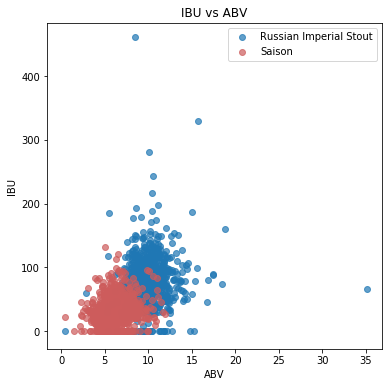

In [209]:
# Russian Imperial Stout とSaisonのデータを使用
beer_recipe1 = beer_recipe.query('Style == "Russian Imperial Stout"')
beer_recipe2 = beer_recipe.query('Style == "Saison"')

abv1 = beer_recipe1['ABV']
ibu1 = beer_recipe1['IBU']
abv2 = beer_recipe2['ABV']
ibu2 = beer_recipe2['IBU']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(abv1, ibu1, alpha = 0.7, label="Russian Imperial Stout")
ax.scatter(abv2, ibu2, color='IndianRed', alpha = 0.7,label="Saison")

ax.set_title('IBU vs ABV')
ax.set_xlabel('ABV')
ax.set_ylabel('IBU')
ax.legend()

---
外れ値が多く、見たい箇所が見えない → 値の分布をそれぞれ確認してみる必要がある

### 4. ヒストグラム
統計で用いられるグラフの一種、横軸に階級、縦軸に度数をとる


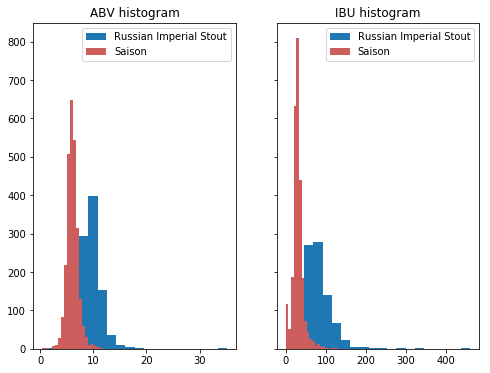

In [214]:
n_bins = 20 #20の階級を用意する

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(8,6))

axs[0].hist(abv1, bins=n_bins,label="Russian Imperial Stout")
axs[1].hist(ibu1, bins=n_bins,label="Russian Imperial Stout")
axs[0].hist(abv2, bins=n_bins, color='IndianRed',label="Saison")
axs[1].hist(ibu2, bins=n_bins, color='IndianRed',label="Saison")

axs[0].set_title('ABV histogram')
axs[1].set_title('IBU histogram')
axs[0].legend()
axs[1].legend()

「平均値からの距離が+2σ離れている」場合、外れ値とみなす<br>
外れ値を除いた上で、再びプロットする

In [160]:
abv1_max_lim = np.average(abv1) + 2*np.std(abv1)
ibu1_max_lim = np.average(ibu1) + 2*np.std(ibu1)
abv2_max_lim = np.average(abv2) + 2*np.std(abv2)
ibu2_max_lim = np.average(ibu2) + 2*np.std(ibu2)

print("外れ値除去後のデータの割合")
print("1. Russian Imperial Stout")
print("   ABV: {:.2f}%".format(len(beer_recipe1.query('ABV < @abv1_max_lim'))/len(abv1)*100))
print("   IBU: {:.2f}%".format(len(beer_recipe1.query('IBU < @ibu1_max_lim'))/len(ibu1)*100))
print("2. Saison")
print("   ABV: {:.2f}%".format(len(beer_recipe2.query('ABV < @abv2_max_lim'))/len(abv2)*100))
print("   IBU: {:.2f}%".format(len(beer_recipe2.query('IBU < @ibu2_max_lim'))/len(ibu2)*100))

外れ値除去後のデータの割合
1. Russian Imperial Stout
   ABV: 96.99%
   IBU: 97.52%
2. Saison
   ABV: 96.48%
   IBU: 96.22%


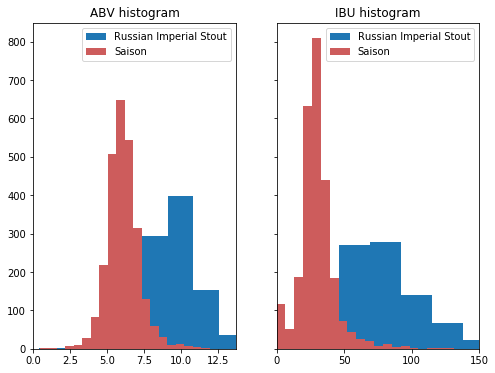

In [215]:
n_bins = 20 #20の階級を用意する

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(8,6))

axs[0].hist(abv1, bins=n_bins,label="Russian Imperial Stout")
axs[1].hist(ibu1, bins=n_bins,label="Russian Imperial Stout")
axs[0].hist(abv2, bins=n_bins, color='IndianRed',label="Saison")
axs[1].hist(ibu2, bins=n_bins, color='IndianRed',label="Saison")

axs[0].set_xlim(0, abv1_max_lim)
axs[1].set_xlim(0, ibu1_max_lim)

axs[0].set_title('ABV histogram')
axs[1].set_title('IBU histogram')

axs[0].legend()
axs[1].legend()

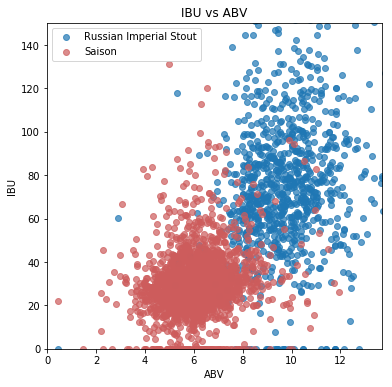

In [217]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(abv1, ibu1, alpha = 0.7,label="Russian Imperial Stout")
ax.scatter(abv2, ibu2, color='IndianRed', alpha = 0.7,label="Saison")

ax.set_xlim(0, abv1_max_lim)
ax.set_ylim(0, ibu1_max_lim)

ax.set_title('IBU vs ABV')
ax.set_xlabel('ABV')
ax.set_ylabel('IBU')
ax.legend()

### 6．箱ひげ図
箱ひげ図では、中央値、四分位数、最大・最小値、外れ値をみることができる<br>
ヒストグラムは、階級ごとの度数（個数)を表現したのにに対し、箱ひげ図はデータのばらつきを表現することができる

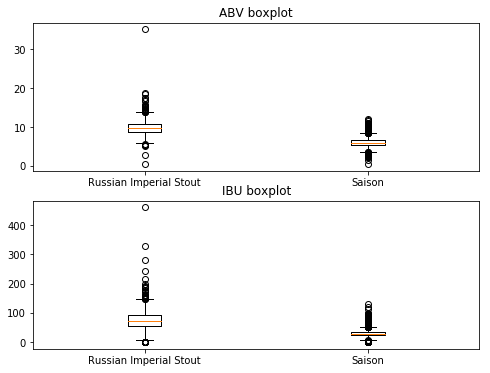

In [194]:
fig, axs = plt.subplots(2,1,figsize=(8,6))
label = ["Russian Imperial Stout","Saison"]

axs[0].boxplot([abv1, abv2],labels=label)
axs[1].boxplot([ibu1, ibu2],labels=label)

axs[0].set_title('ABV boxplot')
axs[1].set_title('IBU boxplot');

### 8．バイオリンプロット
箱ひげ図の両脇に、データから推定した確率密度分布をつけたもの<br>
データ量が膨大で、箱ひげ図ではうまく表現できないときに使える

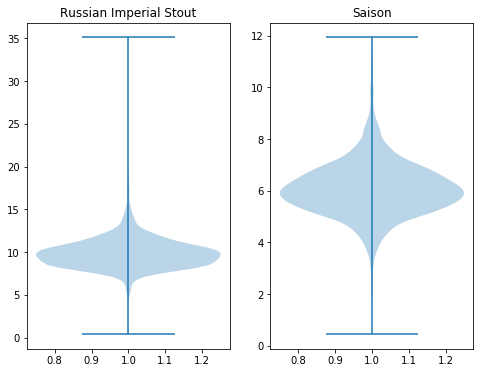

In [230]:
fig, axs = plt.subplots(1,2, figsize=(8,6))

axs[0].violinplot(abv1)
axs[1].violinplot(abv2)

axs[0].set_title('Russian Imperial Stout ABV')
axs[1].set_title('Saison ABV');

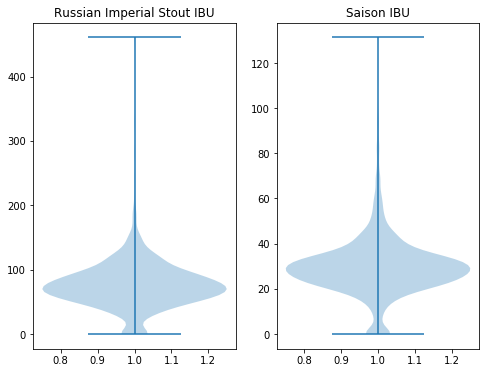

In [231]:
fig, axs = plt.subplots(1,2, figsize=(8,6))

axs[0].violinplot(ibu1)
axs[1].violinplot(ibu2)

axs[0].set_title('Russian Imperial Stout IBU')
axs[1].set_title('Saison IBU');

### 7．ヒートマップ
ビールのStyleを推測する説明変数のそれぞれの相関係数をヒートマップにする

In [118]:
expl = beer_recipe[['FG','ABV','IBU','Color','Efficiency']]
expl.head(5)

,FG,ABV,IBU,Color,Efficiency
BeerID,,,,,
1,1.013,5.48,17.65,4.83,70.0
2,1.021,8.16,60.65,15.64,70.0
3,1.018,5.91,59.25,8.98,70.0
4,1.017,5.80,54.48,8.50,70.0
5,1.010,6.48,17.84,4.57,72.0


                  FG       ABV       IBU     Color  Efficiency
FG          1.000000  0.028299  0.024343  0.019804    0.030810
ABV         0.028299  1.000000  0.419430  0.358258    0.035682
IBU         0.024343  0.419430  1.000000  0.110506   -0.052645
Color       0.019804  0.358258  0.110506  1.000000   -0.079210
Efficiency  0.030810  0.035682 -0.052645 -0.079210    1.000000


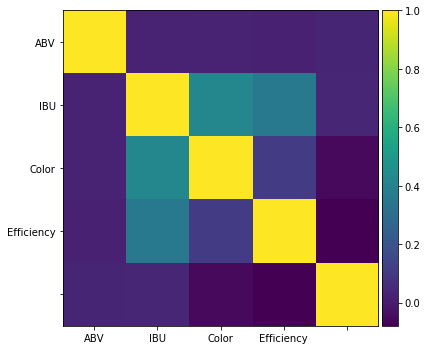

In [135]:
#相関行列の作成
correlation_matrix = expl[:500].corr()
print(correlation_matrix)

#ヒートマップの表示
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(correlation_matrix)

ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)

#カラーバーの表示
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)